# Overview

Get image index and process them to a data structure for torch

In [59]:
import os
import pandas as pd
import torchvision as tv
import torchvision.transforms.functional as TF

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [60]:
index_df = pd.read_csv("../../data/image_index.csv", index_col=0)
index_df.head()

,img,data_set,condition
0,..\..\data\extracted\chest_xray\test\NORMAL\IM...,0,0
1,..\..\data\extracted\chest_xray\test\NORMAL\IM...,0,0
2,..\..\data\extracted\chest_xray\test\NORMAL\IM...,0,0
3,..\..\data\extracted\chest_xray\test\NORMAL\IM...,0,0
4,..\..\data\extracted\chest_xray\test\NORMAL\IM...,0,0


In [75]:
def img_to_tensor_shape(path):
    return list(tv.io.read_image(path).shape)

In [76]:
index_df["image_tensor"] = index_df.img.apply(img_to_tensor_shape)

In [78]:
index_df["channels"] = index_df.image_tensor.apply(lambda x: x[0])
index_df["height"] = index_df.image_tensor.apply(lambda x: x[1])
index_df["width"] = index_df.image_tensor.apply(lambda x: x[2])

In [79]:
index_df.head()

,img,data_set,condition,image_tensor,channels,height,width
0,..\..\data\extracted\chest_xray\test\NORMAL\IM...,0,0,"[1, 1317, 1857]",1,1317,1857
1,..\..\data\extracted\chest_xray\test\NORMAL\IM...,0,0,"[1, 1509, 2111]",1,1509,2111
2,..\..\data\extracted\chest_xray\test\NORMAL\IM...,0,0,"[1, 1837, 2031]",1,1837,2031
3,..\..\data\extracted\chest_xray\test\NORMAL\IM...,0,0,"[1, 1326, 1663]",1,1326,1663
4,..\..\data\extracted\chest_xray\test\NORMAL\IM...,0,0,"[1, 1818, 2053]",1,1818,2053


In [81]:
index_df.groupby(["data_set", "channels"]).count()

img  condition  image_tensor  height  width
data_set channels                                              
0        1          624        624           624     624    624
1        1         4933       4933          4933    4933   4933
         3          283        283           283     283    283
2        1           16         16            16      16     16

- Test(data_set == 0) only contains greyscale images
- Train(data_set == 1) contains color and greyscale images
- Validate(data_set == 2) only contains greyscale images

In [82]:
index_df.describe()

,data_set,condition,channels,height,width
count,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000
mean,0.896175,0.729679,1.096653,970.689037,1327.880806
std,0.313890,0.444164,0.428947,383.392117,363.500922
min,0.000000,0.000000,1.000000,127.000000,384.000000
25%,1.000000,0.000000,1.000000,688.000000,1056.000000
50%,1.000000,1.000000,1.000000,888.000000,1281.000000
75%,1.000000,1.000000,1.000000,1187.000000,1560.000000
max,2.000000,1.000000,3.000000,2713.000000,2916.000000


In [ ]:
datasets = 3
channels = [1, 3]

fig, ax = plt.subplots(datasets, len(channels), figsize = (12,8))

ax.scatter(x=grey_img.height, y=grey_img.width, label="greyscale", color="grey")
ax.scatter(x=color_img.height, y=color_img.width, label="color", color="purple")
plt.legend()

In [91]:
for i in range(1,3):
    print(3%i)
    print(3//i)
    print("-------------")

0
3
-------------
1
1
-------------


## Train, Test, and Validation Data Index

In [61]:
train_df = index_df[index_df.data_set == 1]
train_df.reset_index(inplace=True)

In [62]:
test_df = index_df[index_df.data_set == 0]
test_df.reset_index(inplace=True)

In [63]:
val_df = index_df[index_df.data_set == 2]
val_df.reset_index(inplace=True)

In [69]:
list(img_tensor.shape)

[1, 1858, 2090]

Min/Max Values of CHW

In [13]:
min_c, min_h, min_w, max_c , max_h, max_w

(1, 127, 384, 3, 2713, 2916)

In [28]:
img_shape_df = pd.DataFrame.from_dict({"tensor_shape": tensor_counts})

In [31]:
img_shape_df["channels"] = img_shape_df.tensor_shape.apply(lambda x: x[0])
img_shape_df["height"] = img_shape_df.tensor_shape.apply(lambda x: x[1])
img_shape_df["width"] = img_shape_df.tensor_shape.apply(lambda x: x[2])

In [38]:
img_shape_df.head()

,tensor_shape,channels,height,width
0,"[1, 1317, 1857]",1,1317,1857
1,"[1, 1509, 2111]",1,1509,2111
2,"[1, 1837, 2031]",1,1837,2031
3,"[1, 1326, 1663]",1,1326,1663
4,"[1, 1818, 2053]",1,1818,2053


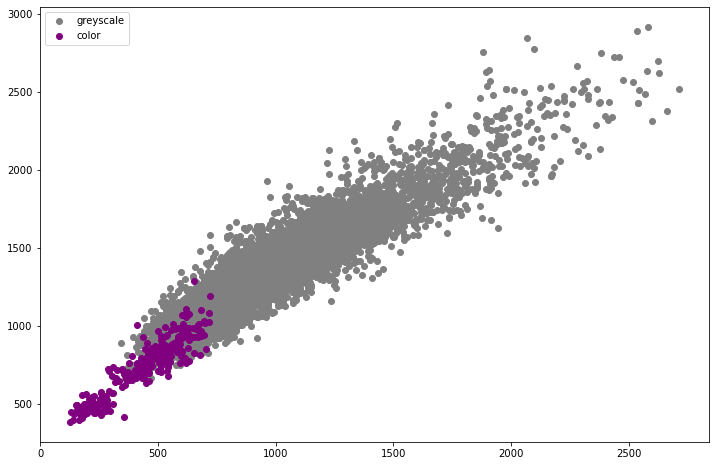

In [47]:
grey_img = img_shape_df[img_shape_df.channels == 1]
color_img = img_shape_df[img_shape_df.channels == 3]

fig, ax = plt.subplots(figsize = (12,8))

ax.scatter(x=grey_img.height, y=grey_img.width, label="greyscale", color="grey")
ax.scatter(x=color_img.height, y=color_img.width, label="color", color="purple")
plt.legend()

No handles with labels found to put in legend.


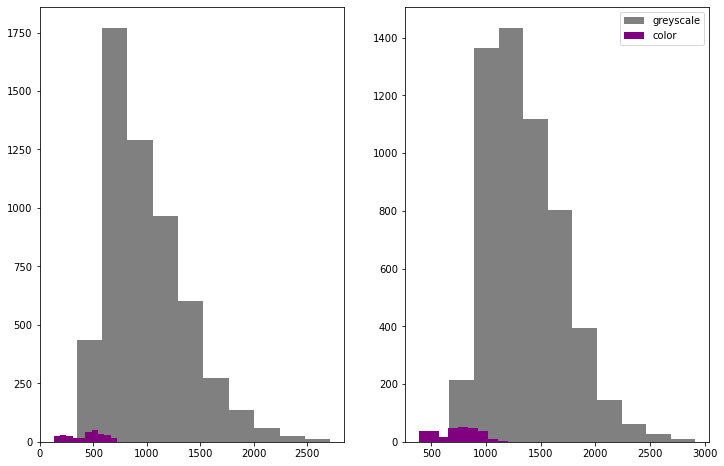

In [57]:
fig, ax = plt.subplots(1,2, figsize = (12,8))

ax[0].hist(x=grey_img.height, label="greyscale", color="grey")
ax[0].hist(x=color_img.height, label="color", color="purple")
ax[0]
plt.legend()
ax[1].hist(x=grey_img.width, label="greyscale", color="grey")
ax[1].hist(x=color_img.width, label="color", color="purple")
plt.legend()

channels
1    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

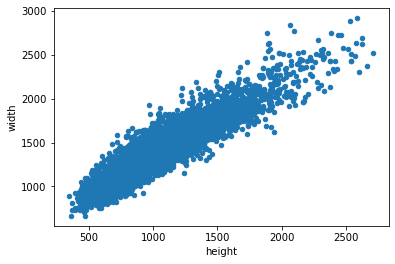

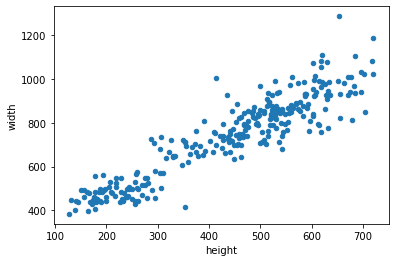

In [37]:
img_shape_df.groupby("channels").plot(kind="scatter", x="height", y="width")

In [19]:
img_shape_df = img_shape_df.explode("shape")

,shape
0,1
0,1317
0,1857
1,1
1,1509


## REFERENCE CODES

In [40]:
grey_img

,tensor_shape,channels,height,width
0,"[1, 1317, 1857]",1,1317,1857
1,"[1, 1509, 2111]",1,1509,2111
2,"[1, 1837, 2031]",1,1837,2031
3,"[1, 1326, 1663]",1,1326,1663
4,"[1, 1818, 2053]",1,1818,2053
...,...,...,...,...
5851,"[1, 944, 1416]",1,944,1416
5852,"[1, 864, 1256]",1,864,1256
5853,"[1, 656, 1016]",1,656,1016
5854,"[1, 952, 1192]",1,952,1192


### Flatten all images to either a single channel or multichannel

#### To a single channel

In [60]:
# test RGB image

test_rgb_path = r"..\..\data\extracted\chest_xray\train\PNEUMONIA\person1298_virus_2228.jpeg"
test_rgb_img = tv.io.read_image(test_rgb_path)

In [61]:
test_rgb_img.shape

torch.Size([3, 503, 714])

In [63]:
rgb_grey_img = TF.rgb_to_grayscale(test_rgb_img) #you can define it to 3 for rgb 

In [64]:
rgb_grey_img.shape

torch.Size([1, 503, 714])

## Image Processing

In [66]:
testpath = train_df.img[0]

In [67]:
testpath

'..\\..\\data\\extracted\\chest_xray\\train\\NORMAL\\IM-0115-0001.jpeg'

### Read Image as a Pytorch Tensor

In [68]:
img_tensor = tv.io.read_image(testpath)

In [70]:
img_tensor

tensor([[[ 22,  24,  24,  ...,  96,  94,  93],
         [ 23,  24,  24,  ...,  97,  94,  92],
         [ 24,  24,  23,  ...,  99,  96,  94],
         ...,
         [ 49,  50,  48,  ..., 119, 119, 119],
         [ 50,  52,  53,  ..., 123, 124, 123],
         [ 52,  53,  54,  ..., 129, 128, 127]]], dtype=torch.uint8)

In [40]:
grey_img

,tensor_shape,channels,height,width
0,"[1, 1317, 1857]",1,1317,1857
1,"[1, 1509, 2111]",1,1509,2111
2,"[1, 1837, 2031]",1,1837,2031
3,"[1, 1326, 1663]",1,1326,1663
4,"[1, 1818, 2053]",1,1818,2053
...,...,...,...,...
5851,"[1, 944, 1416]",1,944,1416
5852,"[1, 864, 1256]",1,864,1256
5853,"[1, 656, 1016]",1,656,1016
5854,"[1, 952, 1192]",1,952,1192


### Resize images

In [55]:
new_img = TF.resize(img_tensor, [244, 244])

### Flatten image to a tensor size of 1

In [25]:
img_tensor_flat = tv.io.encode_jpeg(img_tensor)

In [26]:
img_tensor_flat.shape

torch.Size([284473])

In [42]:
img_tensor_flat

tensor([255, 216, 255,  ...,  87, 255, 217], dtype=torch.uint8)